Importing dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


data collection and processing

In [ ]:
car_ds=pd.read_csv('/content/car data.csv')

In [ ]:
car_ds.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_ds.shape

(301, 9)

In [ ]:
car_ds.info

<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0  
2        Dealer       Manual      0  
3        Dealer       Manual      0  
4        Dealer       Manual      0  
..          ...          ...    ...  
296      Dealer       Manual      0  
297      Dealer       Manual      0  
298      Dealer       Manual      0  
299      Dealer       Manual      0  
300      Dealer       Manual      0  

[301 rows x 9 columns]>

In [ ]:
car_ds.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
print(car_ds.Fuel_Type.value_counts())
print(car_ds.Seller_Type.value_counts())
print(car_ds.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [ ]:
car_ds.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_ds.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_ds.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

**After encoding charcter to nums**

In [ ]:
car_ds.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


*** ***splitting the data and target***

In [ ]:
X=car_ds.drop(['Car_Name','Selling_Price'],axis=1)
Y=car_ds['Selling_Price']

In [ ]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


splitting into training and test data


In [ ]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.1,random_state=2)

Applying Linear regression*

In [ ]:
linreg=LinearRegression()

In [ ]:
linreg.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
training_data_prediction=linreg.predict(xtrain)

In [ ]:
#R square error
errorscore=metrics.r2_score(ytrain,training_data_prediction)
print("R square error:",errorscore)

R square error: 0.8799451660493711


visualizing the actual prices and predicted prices


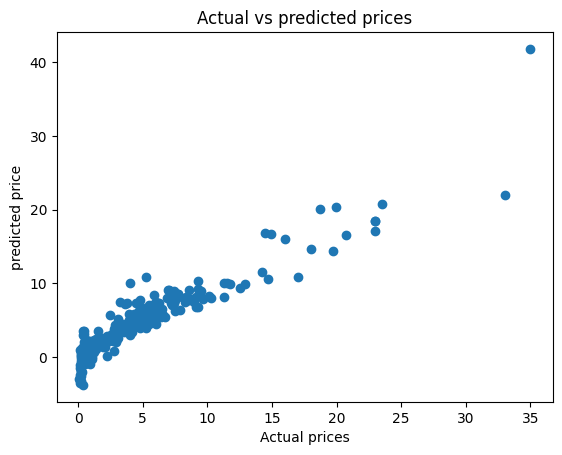

In [ ]:
plt.scatter(ytrain,training_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("predicted price")
plt.title("Actual vs predicted prices")
plt.show()

*Incase of test *data*

In [ ]:
test_data_prediction=linreg.predict(xtest)

In [ ]:
#R square error
errorscore=metrics.r2_score(ytest,test_data_prediction)
print("R square error:",errorscore)

R square error: 0.8365766715027051


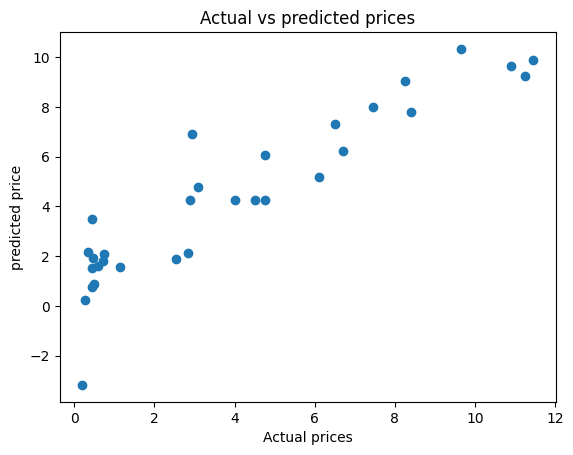

In [ ]:
plt.scatter(ytest,test_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("predicted price")
plt.title("Actual vs predicted prices")
plt.show()

**Applying Lasso regresssion**

In [ ]:
lassoreg=Lasso()

In [ ]:
lassoreg.fit(xtrain,ytrain)

Lasso()

In [ ]:
training_data_prediction=lassoreg.predict(xtrain)

In [ ]:
#R square error
errorscore=metrics.r2_score(ytrain,training_data_prediction)
print("R square error:",errorscore)

R square error: 0.8427856123435794


visualizing the actual prices and predicted prices


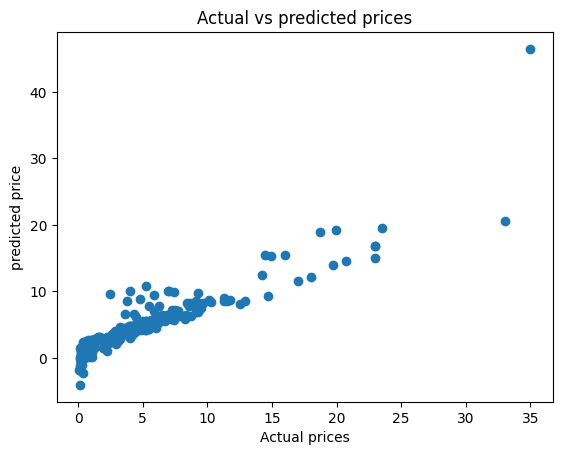

In [ ]:
plt.scatter(ytrain,training_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("predicted price")
plt.title("Actual vs predicted prices")
plt.show()

*Incase of test *data*

In [ ]:
test_data_prediction=lassoreg.predict(xtest)

In [ ]:
#R square error
errorscore=metrics.r2_score(ytest,test_data_prediction)
print("R square error:",errorscore)

R square error: 0.8709167941173195


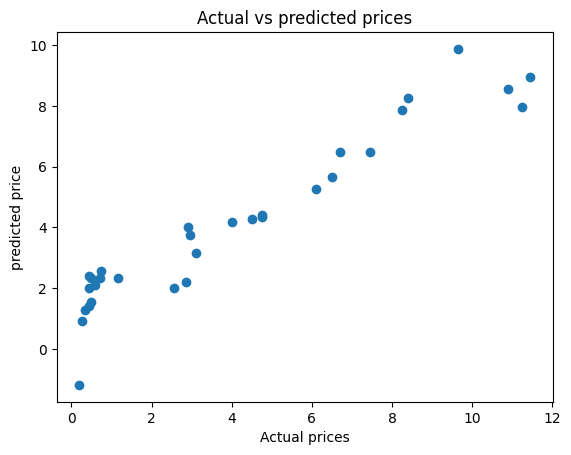

In [ ]:
plt.scatter(ytest,test_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("predicted price")
plt.title("Actual vs predicted prices")
plt.show()